In [4]:
import datetime as dt
import pandas as pd
import xml.etree.ElementTree as ET

# References
# https://github.com/c0rychu/apple-sleep

In [5]:
# Path to the XML file exported form Apple Health app
XML_DATA = "apple_health_export/export.xml"

In [6]:
# Parse XML file exported from Apple Health app
tree = ET.parse(XML_DATA)
root = tree.getroot()

# Store "Record" type data into Pandas.DataFrame
records = [i.attrib for i in root.iter("Record")]
records_df = pd.DataFrame(records)

# Convert datetime format
date_col = ['creationDate', 'startDate', 'endDate']
records_df[date_col] = records_df[date_col].apply(pd.to_datetime)

In [7]:
# Select Sleep Analysis records
sleeps_df = records_df.query("type == 'HKCategoryTypeIdentifierSleepAnalysis'")

# Cut overnight records into two separate records
no_cross = sleeps_df[sleeps_df["startDate"].dt.day == sleeps_df["endDate"].dt.day]
cross = sleeps_df[sleeps_df["startDate"].dt.day != sleeps_df["endDate"].dt.day]
c1 = cross.copy()
c2 = cross.copy()
c1["endDate"] = c1["startDate"].apply(lambda x: x.replace(hour=23, minute=59, second=59))
c2["startDate"] = c2["endDate"].apply(lambda x: x.replace(hour=0, minute=0, second=0))
sleeps_splitted_df = pd.concat([no_cross, c1, c2]).sort_values("startDate")

# export data so this doesn't have to be run each time
sleeps_splitted_df.to_csv('cleaned_data/sleep.csv', index=False)

sleeps_splitted_df.head()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
6138884,HKCategoryTypeIdentifierSleepAnalysis,Sleeptracker®,NaN,NaN,2014-09-28 04:31:12-07:00,2014-09-27 22:39:51-07:00,2014-09-27 23:59:59-07:00,HKCategoryValueSleepAnalysisInBed,NaN
6138883,HKCategoryTypeIdentifierSleepAnalysis,Sleeptracker®,NaN,NaN,2014-09-28 04:31:12-07:00,2014-09-27 22:55:00-07:00,2014-09-27 23:59:59-07:00,HKCategoryValueSleepAnalysisAsleepUnspecified,NaN
6138883,HKCategoryTypeIdentifierSleepAnalysis,Sleeptracker®,NaN,NaN,2014-09-28 04:31:12-07:00,2014-09-28 00:00:00-07:00,2014-09-28 04:30:00-07:00,HKCategoryValueSleepAnalysisAsleepUnspecified,NaN
6138884,HKCategoryTypeIdentifierSleepAnalysis,Sleeptracker®,NaN,NaN,2014-09-28 04:31:12-07:00,2014-09-28 00:00:00-07:00,2014-09-28 04:31:13-07:00,HKCategoryValueSleepAnalysisInBed,NaN
6138888,HKCategoryTypeIdentifierSleepAnalysis,Sleeptracker®,NaN,NaN,2014-09-29 04:31:47-07:00,2014-09-29 00:09:04-07:00,2014-09-29 04:31:48-07:00,HKCategoryValueSleepAnalysisInBed,NaN


In [8]:
sleeps_splitted_df.describe()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
count,34727,34727,32994,0,34727,34727,34727,34727,3797
unique,1,7,105,0,NaN,NaN,NaN,6,63
top,HKCategoryTypeIdentifierSleepAnalysis,Brandon's Apple Watch,10.4,NaN,NaN,NaN,NaN,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x302bf85a0>, name:iPhone, manufac..."
freq,34727,26537,2332,NaN,NaN,NaN,NaN,11800,222
mean,NaN,NaN,NaN,NaN,2022-07-30 18:04:49.064388096-07:00,2022-07-30 13:42:28.318426624-07:00,2022-07-30 14:38:29.983586304-07:00,NaN,NaN
min,NaN,NaN,NaN,NaN,2014-09-28 04:31:12-07:00,2014-09-27 22:39:51-07:00,2014-09-27 23:59:59-07:00,NaN,NaN
25%,NaN,NaN,NaN,NaN,2021-11-29 04:00:18-07:00,2021-11-29 02:08:34-07:00,2021-11-29 03:13:34-07:00,NaN,NaN
50%,NaN,NaN,NaN,NaN,2023-03-11 06:14:15-07:00,2023-03-11 04:51:05-07:00,2023-03-11 05:23:35-07:00,NaN,NaN
75%,NaN,NaN,NaN,NaN,2023-11-03 05:31:08-07:00,2023-11-03 01:09:40-07:00,2023-11-03 01:42:55-07:00,NaN,NaN
max,NaN,NaN,NaN,NaN,2024-07-22 05:27:28-07:00,2024-07-22 04:49:58-07:00,2024-07-22 05:27:28-07:00,NaN,NaN


In [9]:
records_df.type.unique()[60:70]

array(['HKQuantityTypeIdentifierHeartRateVariabilitySDNN'], dtype=object)

# Topics to study
- HKQuantityTypeIdentifierHeartRate
- HKQuantityTypeIdentifierFlightsClimbed
- HKQuantityTypeIdentifierOxygenSaturation
- HKQuantityTypeIdentifierRespiratoryRate
- __HKQuantityTypeIdentifierStepCount__
- __HKQuantityTypeIdentifierDistanceWalkingRunning__
- __HKQuantityTypeIdentifierBasalEnergyBurned__
- __HKQuantityTypeIdentifierActiveEnergyBurned__
- HKQuantityTypeIdentifierAppleExerciseTime
- __HKQuantityTypeIdentifierDistanceCycling__
- HKQuantityTypeIdentifierVO2Max
- HKQuantityTypeIdentifierWalkingHeartRateAverage
- HKQuantityTypeIdentifierEnvironmentalAudioExposure
- HKQuantityTypeIdentifierAppleStandTime
- HKQuantityTypeIdentifierWalkingSpeed
- HKDataTypeSleepDurationGoal
- HKQuantityTypeIdentifierHeartRateRecoveryOneMinute
- HKQuantityTypeIdentifierPhysicalEffort
- HKCategoryTypeIdentifierSleepAnalysis
- HKCategoryTypeIdentifierHighHeartRateEvent
- HKCategoryTypeIdentifierToothbrushingEvent

# Cycling cleaning notes
- drop type, sourceName column (all same values)
- drop unit column but change metric to indicate miles
- Study source versions, see if data format changes
- Convert value to numeric
- Study device versions, see if data format changes
  - Has device version, name, manufacturer, model, hardware, software
  - Will take more parsing to study this; table for later
- Make dates timezone aware and set to AZ time
  - May only need to do for comparisons

In [20]:
# process similarly to cycling data (refactor into function in case this pattern continues)
def preprocess_exercise(df, filename, metric='miles', exercise=False):
    # clean up exercise data - may want to restore device later
    df.drop(['type', 'sourceName', 'unit', 'device', 'sourceVersion'], 
                    axis=1, 
                    inplace=True)
    df.rename(columns={'value': metric, 
                       'startDate': 'start_date',
                       'endDate': 'end_date',
                       'creationDate': 'creation_date'}, inplace=True)
    df[metric] = pd.to_numeric(df[metric])
    df['creation_date'] = df['creation_date'].dt.tz_convert('US/Arizona')
    df['start_date'] = df['start_date'].dt.tz_convert('US/Arizona')
    df['end_date'] = df['end_date'].dt.tz_convert('US/Arizona')
    df.sort_values(['creation_date'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    if exercise and metric=='miles':
        # calculate times, speed
        df['seconds'] = (df['end_date'] - df['start_date']).dt.total_seconds()
        df['avg_mph'] = df[metric] / (df['seconds'] / 3600)

    # export granular, focused data for analysis
    df.to_csv(f'cleaned_data/{filename}.csv', index=False)

    

    if exercise and metric=='miles':
        # calculate aggregated speed - assumes miles for metric and exercise=True
        # export daily summaries for analysis
        df_date = df.groupby(df['start_date'].dt.date)[[metric, 'seconds']].sum().reset_index()
        df_date['avg_mph'] = df_date[metric] / (df_date['seconds'] / 3600)
    else:
        df_date = df.groupby(df['start_date'].dt.date)[[metric]].sum().reset_index()

    df_date.to_csv(f'cleaned_data/daily_{filename}.csv', index=False)
    return df

In [21]:
# HKQuantityTypeIdentifierDistanceCycling
cycling_df = records_df.query("type == 'HKQuantityTypeIdentifierDistanceCycling'").copy()
cycling_df = preprocess_exercise(cycling_df, 'cycling', exercise=True)
cycling_df.head()

,creation_date,start_date,end_date,miles,seconds,avg_mph
0,2015-05-24 07:52:21-07:00,2015-05-24 07:52:09-07:00,2015-05-24 07:52:21-07:00,0.000446,12.0,0.133757
1,2015-05-24 07:52:27-07:00,2015-05-24 07:52:21-07:00,2015-05-24 07:52:27-07:00,0.000634,6.0,0.380182
2,2015-05-24 07:52:33-07:00,2015-05-24 07:52:27-07:00,2015-05-24 07:52:33-07:00,0.000631,6.0,0.378815
3,2015-05-24 07:52:38-07:00,2015-05-24 07:52:33-07:00,2015-05-24 07:52:38-07:00,0.000784,5.0,0.564571
4,2015-05-24 07:52:44-07:00,2015-05-24 07:52:38-07:00,2015-05-24 07:52:44-07:00,0.001128,6.0,0.676848


In [23]:
# take a look at single day of cycling data
len(cycling_df[cycling_df['creation_date'].dt.date == dt.date(2015, 5, 24)])

349

<Axes: xlabel='creation_date'>

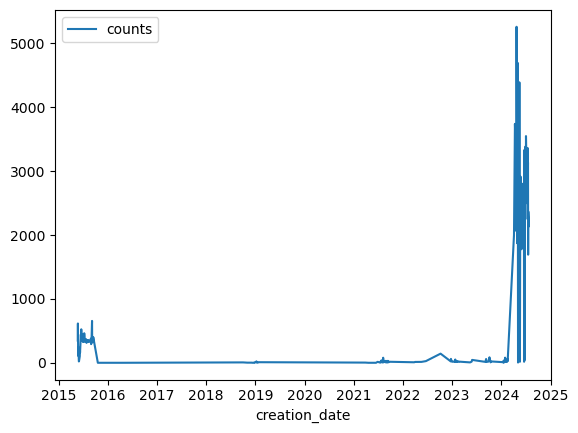

In [25]:
# figure out how many entries there are by day
cycling_day_counts = cycling_df.groupby(cycling_df['creation_date'].dt.date)[['miles']].count()
cycling_day_counts.rename(columns={'miles': 'counts'}, inplace=True)
cycling_day_counts.plot()

In [26]:
cycling_day_counts.describe()

,counts
count,252.000000
mean,662.543651
std,1101.076852
min,1.000000
25%,15.000000
50%,29.500000
75%,449.500000
max,5260.000000


In [27]:
cycling_df.dtypes

creation_date    datetime64[ns, US/Arizona]
start_date       datetime64[ns, US/Arizona]
end_date         datetime64[ns, US/Arizona]
miles                               float64
seconds                             float64
avg_mph                             float64
dtype: object

In [29]:
# how many days worth of data?
len(cycling_df.creation_date.dt.date.unique())

252

In [30]:
walking_running_df = records_df.query("type == 'HKQuantityTypeIdentifierDistanceWalkingRunning'").copy()
walking_running_df = preprocess_exercise(walking_running_df, 'walking_running')
walking_running_df.head()

,creation_date,start_date,end_date,miles
0,2014-09-19 13:13:35-07:00,2014-09-19 08:55:05-07:00,2014-09-19 08:55:10-07:00,0.002349
1,2014-09-19 13:13:35-07:00,2014-09-19 10:35:26-07:00,2014-09-19 10:35:29-07:00,0.003244
2,2014-09-19 13:13:35-07:00,2014-09-19 10:35:24-07:00,2014-09-19 10:35:26-07:00,0.002610
3,2014-09-19 13:13:35-07:00,2014-09-19 10:35:16-07:00,2014-09-19 10:35:18-07:00,0.000957
4,2014-09-19 13:13:35-07:00,2014-09-19 10:35:13-07:00,2014-09-19 10:35:16-07:00,0.001100


In [31]:
# HKQuantityTypeIdentifierHeartRate
heart_rate_df = records_df.query("type == 'HKQuantityTypeIdentifierHeartRate'").copy()
heart_rate_df = preprocess_exercise(heart_rate_df, 'heart_rate', metric='beats_per_min')
heart_rate_df = heart_rate_df.sort_values('start_date')
heart_rate_df.tail()

,creation_date,start_date,end_date,beats_per_min
905829,2024-07-22 07:45:15-07:00,2024-07-22 07:45:11-07:00,2024-07-22 07:45:11-07:00,101.0
905830,2024-07-22 07:45:20-07:00,2024-07-22 07:45:17-07:00,2024-07-22 07:45:17-07:00,93.0
905831,2024-07-22 07:45:25-07:00,2024-07-22 07:45:21-07:00,2024-07-22 07:45:21-07:00,99.0
905833,2024-07-22 07:50:50-07:00,2024-07-22 07:45:50-07:00,2024-07-22 07:45:50-07:00,91.0
905832,2024-07-22 07:48:24-07:00,2024-07-22 07:48:23-07:00,2024-07-22 07:48:23-07:00,95.0


In [32]:
heart_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905834 entries, 0 to 905832
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype                     
---  ------         --------------   -----                     
 0   creation_date  905834 non-null  datetime64[ns, US/Arizona]
 1   start_date     905834 non-null  datetime64[ns, US/Arizona]
 2   end_date       905834 non-null  datetime64[ns, US/Arizona]
 3   beats_per_min  905834 non-null  float64                   
dtypes: datetime64[ns, US/Arizona](3), float64(1)
memory usage: 34.6 MB
